<a href="https://colab.research.google.com/github/anmol1810rs/The_Sparks_Foundation_Internship/blob/main/GRIP_TASK3_SAMPLE_SUPERSTORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express  as plot
import folium
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the dataset
store_data = pd.read_csv('/content/SampleSuperstore.csv')
store_data.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
# Analyzing the datatypes of the objects
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#Analyzing the shape (Rows and Columns) of the dataset
store_data.shape

(9994, 13)

In [8]:
# Analyzing the numerical attributes 
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Checking the number of columns present
store_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
# Checking for unique values of each attribute
store_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
# Checking for all NULL values
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [88]:
# Analyzing the segments of the SampleSuperstore
store_data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

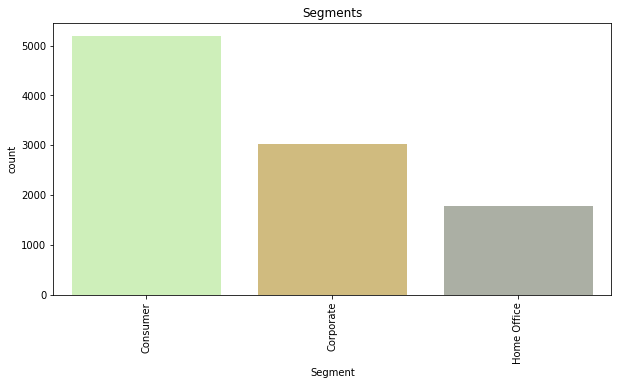

In [95]:
# Visualizing the Segments in terms of their counts
plt.figure(figsize = (10,5))
sns.countplot(x = 'Segment', data = store_data, palette= ["#ccf8b1","#ddc272", "#abb1a2"])
plt.title('Segments')
plt.xticks(rotation = 90);

In [99]:
#Checking for the Max Sales reached across all categories of products
store_data.Sales.max()

22638.48

In [97]:
# Checking for Max Profit earned across all categories of products
store_data.Profit.max()

8399.976

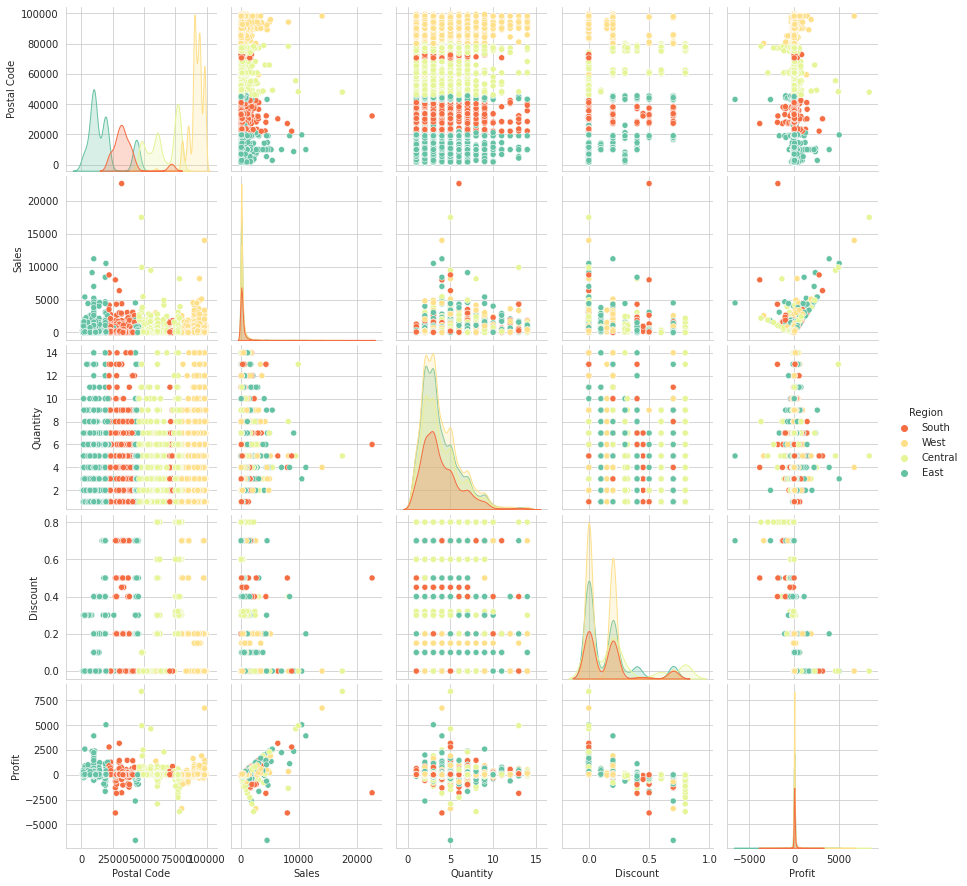

In [101]:
# Pairplots formation for all possible attributes on baiss of region
sns.set_style("whitegrid")
sns.pairplot(store_data,hue="Region",palette='Spectral')

In [15]:
# Checking for the most poular category among all product categories
store_data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [53]:
subcat_data = store_data['SubCategory'].tolist()
print(subcat_data)

['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Tables', 'Phones', 'Paper', 'Binders', 'Appliances', 'Binders', 'Storage', 'Storage', 'Art', 'Phones', 'Binders', 'Art', 'Appliances', 'Chairs', 'Tables', 'Binders', 'Accessories', 'Bookcases', 'Binders', 'Furnishings', 'Envelopes', 'Art', 'Binders', 'Art', 'Paper', 'Phones', 'Furnishings', 'Envelopes', 'Bookcases', 'Chairs', 'Phones', 'Phones', 'Storage', 'Storage', 'Accessories', 'Binders', 'Storage', 'Accessories', 'Phones', 'Binders', 'Labels', 'Furnishings', 'Chairs', 'Fasteners', 'Phones', 'Storage', 'Paper', 'Chairs', 'Paper', 'Accessories', 'Binders', 'Art', 'Accessories', 'Binders', 'Paper', 'Furnishings', 'Chairs', 'Art', 'Phones', 'Paper', 'Binders', 'Paper', 'Chairs', 'Furnishings', 'Storage', 'Binders', 'Furnishings', 'Storage', 'Furnishings', 'Appliances', 'Binders', 'Art', 'Storage', 'Envelopes', 'Storage', 'Chairs', 'Accessories', 'Labels', 'Storage', 'Art', 

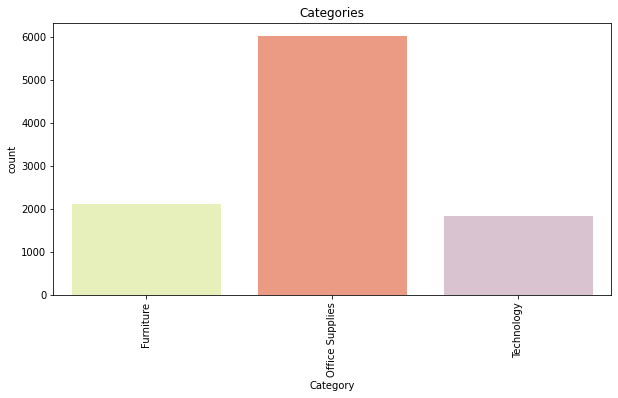

In [32]:
# Visualizing the Categories in terms of their counts
plt.figure(figsize = (10,5))
sns.countplot(x = 'Category', data = store_data, palette= ["#edf8b1","#fc9272", "#dcc0d2"])
plt.title('Categories')
plt.xticks(rotation = 90);

In [23]:
store_data.rename(columns = {'Sub-Category':'SubCategory'}, inplace = True) 

In [24]:
# Checking for the most popular Sub Category among all product categories
store_data.SubCategory.value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: SubCategory, dtype: int64

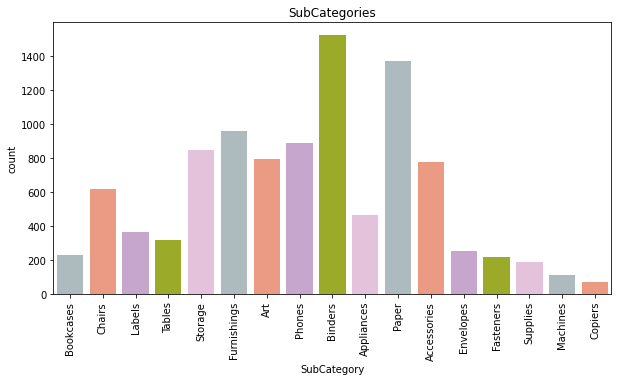

In [40]:
# Visualizing the Categories in terms of their counts
plt.figure(figsize = (10,5))
sns.countplot(x = 'SubCategory', data = store_data, palette= ["#aabbc1","#fc9272", "#caa0d2",'#abc012','#eabcde'])
plt.title('SubCategories')
plt.xticks(rotation = 90);

In [54]:
#Analyzing the data for the highest stored Category
office_store_data = store_data[store_data['Category']=='Office Supplies']
office_store_data = office_store_data[~office_store_data['SubCategory'].isin(['Supplies','Accessories'])]
office_store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700


In [57]:
# Analyzing the most ordered Sub Category in Office_Supplies
office_store_subcat_data  = office_store_data.sort_values("SubCategory",ascending=False)
office_store_subcat_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
4161,Standard Class,Consumer,United States,New York City,New York,10035,East,Office Supplies,Storage,22.58,2,0.0,5.8708
7961,Second Class,Corporate,United States,Miramar,Florida,33023,South,Office Supplies,Storage,81.36,5,0.2,-19.3230
5476,First Class,Home Office,United States,Maple Grove,Minnesota,55369,Central,Office Supplies,Storage,84.55,5,0.0,22.8285
8028,Second Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,772.68,4,0.0,108.1752
8026,Second Class,Corporate,United States,New York City,New York,10035,East,Office Supplies,Storage,78.80,1,0.0,1.5760


In [56]:
# Checking for the most popular Sub Category among the Supplies(most ordered product category)
office_store_subcat_data.SubCategory.value_counts()

Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Name: SubCategory, dtype: int64

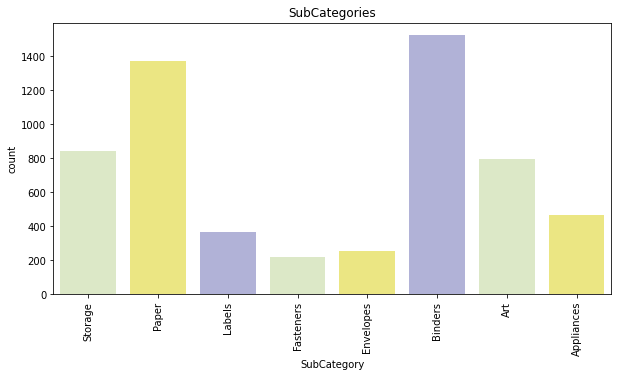

In [63]:
# Visualizing the office Supplies SubCategories in terms of their counts
plt.figure(figsize = (10,5))
sns.countplot(x = 'SubCategory', data = office_store_subcat_data, palette= ["#ddeec1","#fcf572",'#aaacde'])
plt.title('SubCategories')
plt.xticks(rotation = 90);

In [64]:
# Total Sales in the office_Supplies Category
sum(office_store_data['Sales'])

672373.4940000033

In [74]:
#Sum of the Binders (Top1) Subcategory of the office_Sales dept.
office_store_subcat_binders_data = office_store_subcat_data[office_store_subcat_data['SubCategory']=='Binders']
sum(office_store_subcat_binders_data['Sales'])

203412.73299999995

In [75]:
#Sum of the Binders (Top2) Subcategory of the office_Sales dept.
office_store_subcat_paper_data = office_store_subcat_data[office_store_subcat_data['SubCategory']=='Paper']
sum(office_store_subcat_paper_data['Sales'])

78479.2060000001

In [76]:
#Sum of the Binders (Top3) Subcategory of the office_Sales dept.
office_store_subcat_storage_data = office_store_subcat_data[office_store_subcat_data['SubCategory']=='Storage']
sum(office_store_subcat_storage_data['Sales'])

223843.60800000004

In [79]:
# Total profits earned form the office Supplies Category (Top Selling Category)
sum(office_store_data['Profit'])

123679.90030000015

Text(0.5, 1.0, 'Sales vs Profit for Binders')

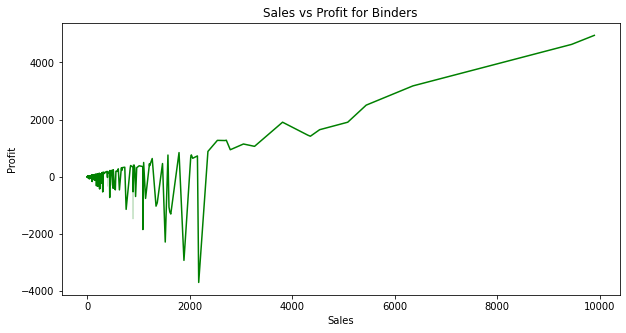

In [84]:
# Plotting Total Sales vs Total profit graph of the office Supplies(Binders) dept.
plt.figure(figsize=(10,5))
sns.lineplot(x='Sales',y='Profit',data=office_store_subcat_binders_data,color='green')
plt.title("Sales vs Profit for Binders")
